<a href="https://colab.research.google.com/github/AvishekBis/CSE-314-Data-Communication-Sessional-/blob/main/CSE_314_Online_payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course: CSE-314 Data Communication (Seesional)**
# **ID: 2104097**

# **Project Name :** **Online Payment Fraud Detection**
# **Introduction:**
Online payment fraud refers to unauthorized or malicious activities conducted during electronic financial transactions. With the exponential rise of e-commerce, mobile banking, and digital wallets, the frequency and sophistication of fraudulent activities have also increased. Identifying fraudulent transactions in real-time is crucial to safeguard financial systems and protect consumers. This project leverages machine learning—particularly a neural network model—to detect and classify fraudulent transactions in an online payment dataset.
# **Objective:**
The main objectives of this project are to:

  Analyze online transaction data to understand patterns and characteristics of fraud.

  Build an effective machine learning model to detect fraudulent transactions.

  Minimize false positives while maintaining high detection rates for fraudulent activities.

  Demonstrate the applicability of deep learning methods, particularly neural networks, for fraud detection tasks.

 # **Dataset Description:**

The dataset used is named onlinefraud.csv, comprising over 6 million transaction records. Key features include:

   step: Time unit representing the hour of the transaction.

  type: Type of transaction (e.g., PAYMENT, CASH_OUT, TRANSFER, etc.).

  amount: Monetary amount involved in the transaction.

  nameOrig / nameDest: Anonymized originator and recipient identifiers.

  oldbalanceOrg / newbalanceOrig: Sender's balance before and after the transaction.

  oldbalanceDest / newbalanceDest: Receiver's balance before and after the transaction.

  isFraud: Target label indicating if the transaction is fraudulent.

  isFlaggedFraud: Indicates if the transaction was flagged by the system.

Initial exploration showed significant class imbalance, with only 0.13% of the transactions labeled as fraud. Fraud was primarily associated with the TRANSFER and CASH_OUT transaction types.
# **Code Explanation:**

This project is implemented in Python using Jupyter Notebook and follows a comprehensive data science pipeline. Here’s a high-level overview of each step:
1. Data Loading and Cleaning

   Loaded the dataset using pandas.

  Checked for missing values and found none.

  Dropped high-cardinality columns (nameOrig, nameDest) and the isFlaggedFraud column due to extreme imbalance and limited usefulness.

2. Exploratory Data Analysis (EDA)

  Plotted distributions of transaction types, amounts, and balances using histograms, strip plots, and box plots.

   Used cross-tabulations and bar plots to show fraud distribution across transaction types.

   Identified that fraudulent transactions occur only in TRANSFER and CASH_OUT.

3. Feature Engineering

   Created new features like:

  balance_diff_org = newbalanceOrig - oldbalanceOrg

  balance_diff_dest = newbalanceDest - oldbalanceDest

  Applied one-hot encoding to convert the categorical type column into numeric format.

4. Handling Imbalanced Data

  Used SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes and address the extreme rarity of fraudulent transactions.

5. Data Splitting

  Split the data into training, validation, and test sets in an 80/10/10 ratio while preserving class distribution.

6. Model Building with Neural Networks

  Constructed a neural network using Keras with:

  Three hidden layers (128, 64, 32 neurons respectively)

  ReLU activation and dropout for regularization

  Sigmoid output for binary classification

  Used binary_crossentropy as the loss function and Adam optimizer for training.

7. Model Training and Evaluation

   Trained the model using early stopping based on validation loss to avoid overfitting.

  Evaluated the model on the test set using:

  Accuracy

  Precision, Recall, and F1-score

  Confusion Matrix

  Visualized results with confusion matrix heatmaps and classification metric bar plots.

8. Results

  Achieved an overall accuracy of ~95.5%.

  F1-score for fraud detection was around 0.95, showing a strong balance between precision and recall.

  Confusion matrix showed that the model correctly identified the majority of fraudulent transactions, with minimal false negatives.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving onlinefraud.csv to onlinefraud.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


This code cell first imports the numpy and pandas libraries, commonly used for numerical operations and data manipulation in Python.

It then reads a CSV file named onlinefraud.csv into a pandas DataFrame called df. Finally, it displays the entire DataFrame df to show its contents.


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


The last executed cell uses the .head() method on the DataFrame df. This method returns the first 5 rows of the DataFrame by default. It's a useful way to quickly inspect the structure and content of your data.

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



  df.shape returns a tuple representing the dimensions of the DataFrame (number of rows, number of columns).
  df.info() prints a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.

These commands are useful for getting a quick overview of the size and structure of the dataset.

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The selected code cell uses the df.describe() method. This method generates descriptive statistics of the DataFrame df. It provides a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns, excluding NaN values. This includes counts, mean, standard deviation, minimum and maximum values, and the 25th, 50th (median), and 75th percentiles.

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


The selected code cell uses the df.isnull().sum() method. This method checks for missing values in each column of the DataFrame df.

  df.isnull() returns a boolean DataFrame of the same shape as df, where True indicates a missing value and False indicates a non-missing value.
  .sum() is then applied to this boolean DataFrame, which counts the number of True values (missing values) in each column.

The output shows that there are no missing values in any of the columns of the DataFrame.


In [ ]:
df.nameOrig.value_counts()

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
...,...
C1567523029,1
C644777639,1
C1256645416,1


The selected code cell uses the .value_counts() method on the nameOrig column of the DataFrame df. This method returns a Series containing counts of unique values in the nameOrig column. The resulting Series is in descending order so that the first element is the most frequently-occurring element. This helps in understanding the distribution of originating customer names in the dataset.

In [ ]:
df.nameDest.value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


The selected code cell uses the .value_counts() method on the nameDest column of the DataFrame df. This method returns a Series containing counts of unique values in the nameDest column. The resulting Series is in descending order so that the first element is the most frequently-occurring element. This helps in understanding the distribution of destination entities in the dataset.

In [ ]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


The code cell uses the .value_counts() method on the isFlaggedFraud column of the DataFrame df. This method returns a Series containing counts of unique values in the isFlaggedFraud column. The output shows that the vast majority of transactions (6,362,604) are not flagged as fraud (0), while only a very small number (16) are flagged as fraud (1). This indicates a significant class imbalance in the isFlaggedFraud column.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def showPlot(feature, bins=10, color='grey', figsize=(12, 6)):
    """
    Visualizes the distribution of a specific feature in the dataset with a histogram.

    Parameters:
    - feature (str): The column name for which the histogram will be plotted.
    - bins (int): The number of bins to be used in the histogram (default is 10).
    - color (str): The color of the bars in the histogram (default is 'grey').
    - figsize (tuple): The size of the figure (default is (12, 6)).

    Displays:
    - A histogram of the specified feature with additional context like legend, axis labels,
      and optional lines for mean/median.
    """

    # Set the plot size and style
    plt.figure(figsize=figsize)

    # Plot the histogram
    df[feature].plot(kind='hist', bins=bins, facecolor=color, edgecolor='black', alpha=0.7, label='Data Distribution')

    # Title and axis labels for better context
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(f'{feature} Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add a legend to the plot
    plt.legend(loc='upper right')

    # Calculate mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()

    # Add lines for mean and median for better insight
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=3, label=f'Median: {median_value:.2f}')

    # Set the limits for x-axis to ensure the lines are visible
    plt.xlim(df[feature].min() - 0.1*(df[feature].max() - df[feature].min()),
             df[feature].max() + 0.1*(df[feature].max() - df[feature].min()))

    # Show grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

The code cell defines a Python function called showPlot. This function is designed to create and display a histogram for a specified numerical column in the DataFrame df.

Here's a breakdown of what the function does:

  Imports: It imports matplotlib.pyplot for plotting and seaborn for enhanced visualizations (although seaborn is imported, it's not directly used in the plotting part of this function). %matplotlib inline is a magic command used in Jupyter/Colab environments to display plots directly within the notebook.
  Function Definition: It defines the showPlot function which takes the following arguments:
        feature: The name of the column in the DataFrame you want to visualize.
        bins: The number of bins for the histogram (defaults to 10).
        color: The color of the histogram bars (defaults to 'grey').
        figsize: The size of the plot figure (defaults to (12, 6)).
   Plotting:
        plt.figure(figsize=figsize): Sets the size of the plot.
        df[feature].plot(kind='hist', ...): Creates the histogram using pandas' plotting capabilities, specifying the kind as 'hist', the number of bins, face color, edge color, transparency, and a label for the legend.
        plt.title(...), plt.xlabel(...), plt.ylabel(...): Sets the title and axis labels for clarity.
        plt.legend(...): Displays the legend on the plot.
  Mean and Median Lines:
        mean_value = df [ feature ].mean(): Calculates the mean of the specified feature column.
        median_value = df[feature].median(): Calculates the median of the specified feature column.
        plt.axvline(...): Draws vertical dashed lines on the histogram to indicate the mean (red) and median (blue) values, along with their labels.
  Axis Limits and Grid:
        plt.xlim(...): Sets the limits for the x-axis to ensure the mean and median lines are visible.
        plt.grid(True): Adds a grid to the plot for better readability.
  Display Plot:
        plt.show(): Displays the generated plot.

In essence, this function provides a reusable way to quickly visualize the distribution of any numerical column in your DataFrame with added context like the mean and median.

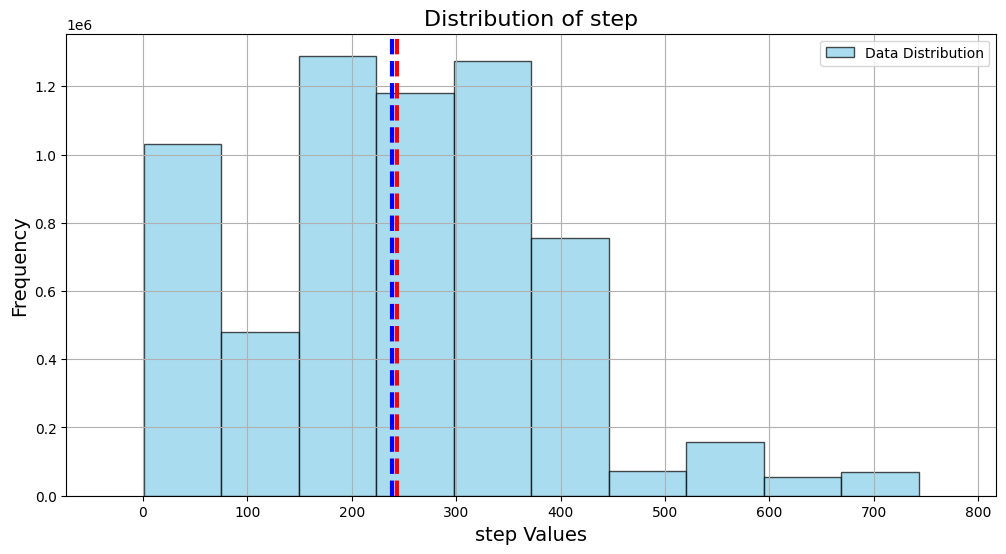

In [ ]:
showPlot('step', bins=10, color='skyblue')

The code cell calls the showPlot function that was defined in the previous cell.

  It passes the column name 'step' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'skyblue'.

This will generate and display a histogram showing the distribution of the 'step' column, with the mean and median values indicated by dashed lines, and the bars colored 'skyblue'.


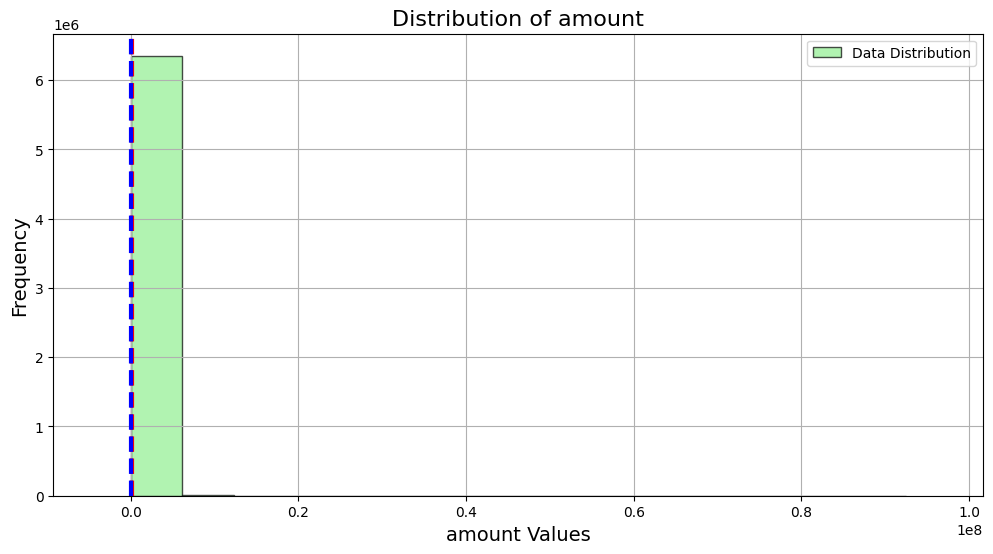

In [ ]:
showPlot('amount', bins=15, color='lightgreen')

The selected code cell calls the showPlot function that was defined earlier.

  It passes the column name 'amount' as the feature argument.
  It sets the number of bins to 15.
  It sets the color of the histogram bars to 'lightgreen'.

This will generate and display a histogram showing the distribution of the 'amount' column, with the mean and median values indicated by dashed lines, and the bars colored 'lightgreen'.

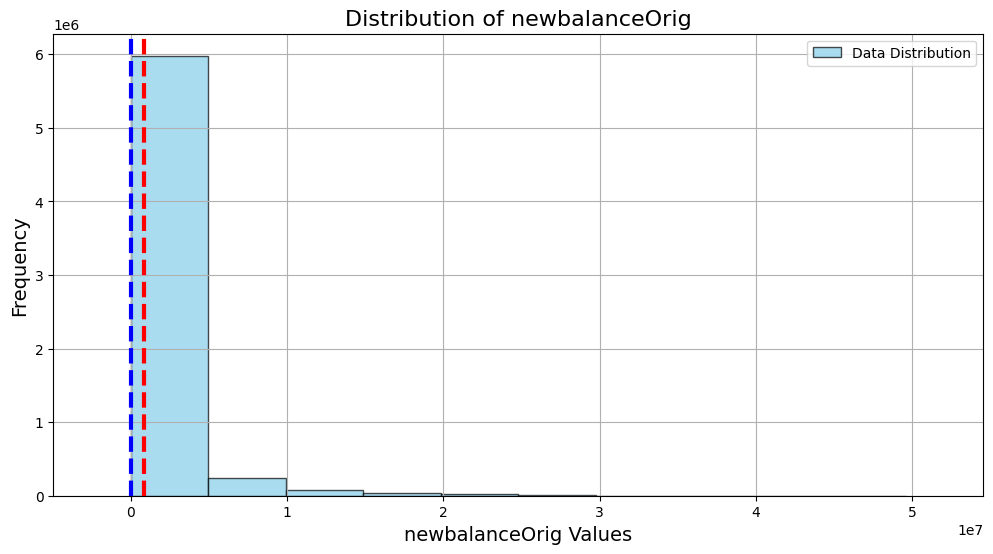

In [ ]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

The selected code cell calls the showPlot function that was defined earlier.

  It passes the column name 'newbalanceOrig' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'skyblue'.

This will generate and display a histogram showing the distribution of the 'newbalanceOrig' column, with the mean and median values indicated by dashed lines, and the bars colored 'skyblue'.

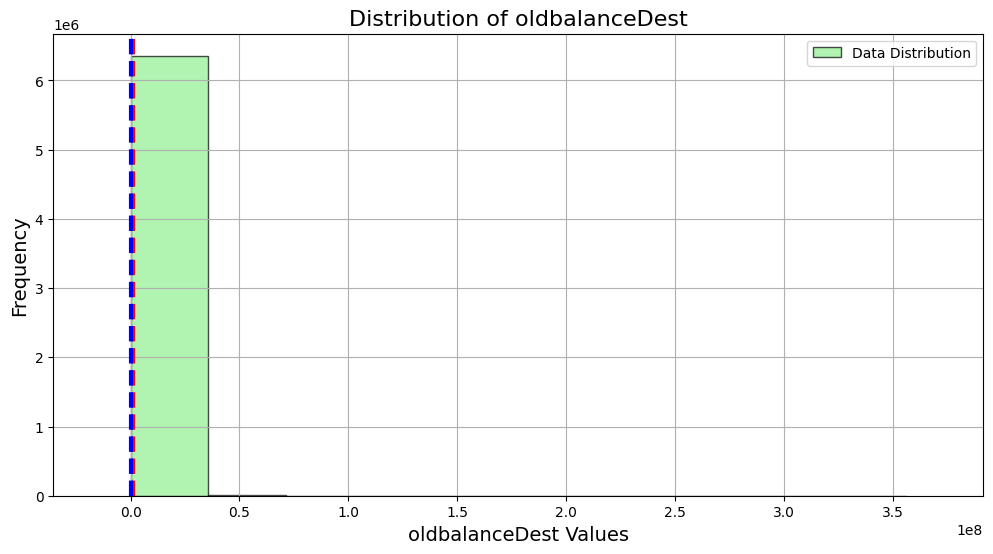

In [ ]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

The code cell calls the showPlot function that was defined earlier.

  It passes the column name 'oldbalanceDest' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'lightgreen'.

This will generate and display a histogram showing the distribution of the 'oldbalanceDest' column, with the mean and median values indicated by dashed lines, and the bars colored 'lightgreen'.

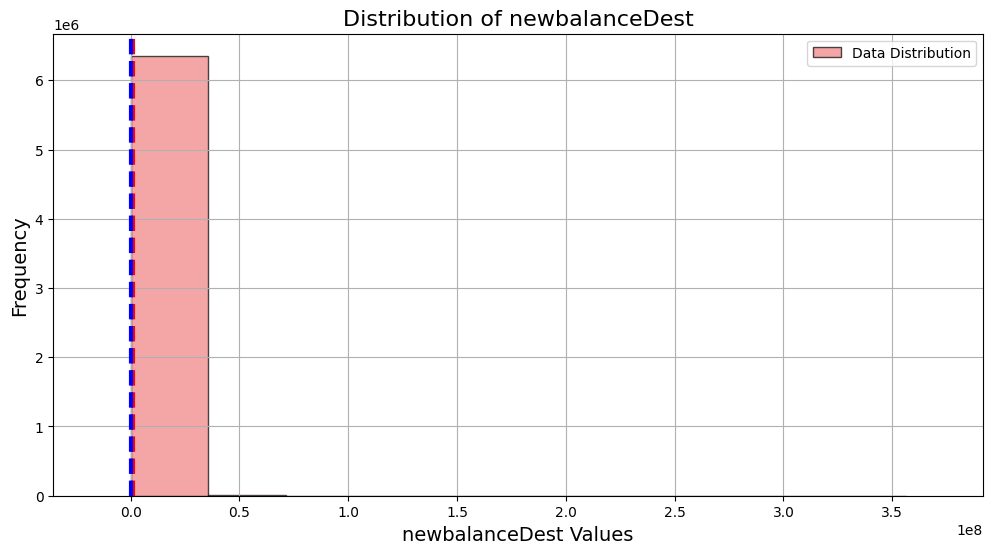

In [ ]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

The code cell calls the showPlot function that was defined earlier.

  It passes the column name 'newbalanceDest' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'lightcoral'.

This will generate and display a histogram showing the distribution of the 'newbalanceDest' column, with the mean and median values indicated by dashed lines, and the bars colored 'lightcoral'.

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




The code cell iterates through a list of numerical features (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) and for each feature, it calculates and prints the 10th and 90th percentiles of the data in that column.

This helps to understand the spread of the data and identify potential outliers or the range within which most of the data falls.


In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] < lower, lower, df[i]) # Corrected lower bound condition
    df[i] = np.where(df[i] > upper, upper, df[i]) # Corrected upper bound condition
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




The code cell iterates through a list of numerical features (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest). For each feature, it calculates the 10th (lower) and 90th (upper) percentiles.

Then, it uses np.where to replace values in the DataFrame:

  If a value in the column is less than the lower percentile, it's replaced with the lower percentile value.
  If a value is greater than the upper percentile, it's replaced with the upper percentile value.
  Otherwise, the original value is kept.

Finally, it prints the feature name and its skewness value after this capping process. This process helps to reduce the impact of extreme outliers on the data distribution.

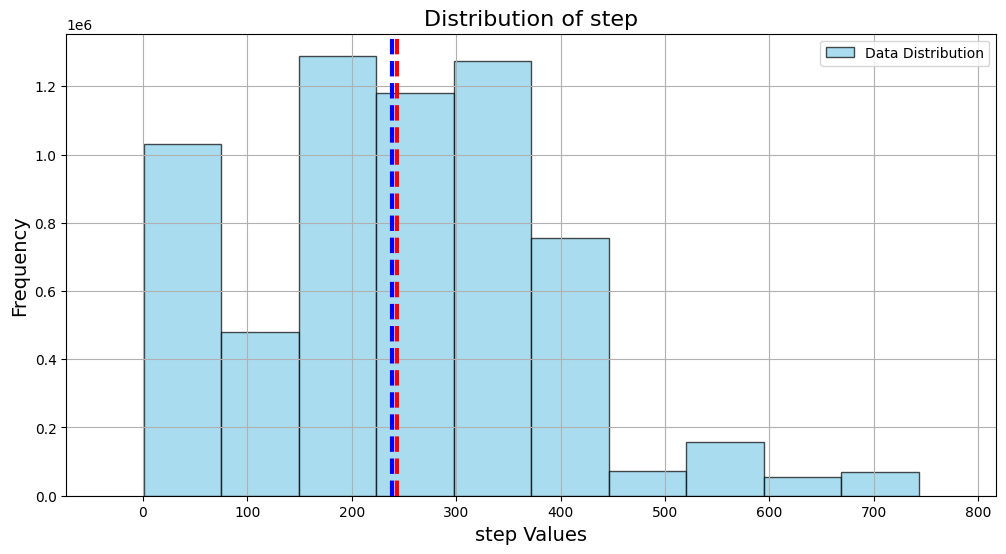

In [ ]:
showPlot('step', bins=10, color='skyblue')

The code cell calls the showPlot function that was defined earlier.

  It passes the column name 'step' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'skyblue'.

This will generate and display a histogram showing the distribution of the 'step' column, with the mean and median values indicated by dashed lines, and the bars colored 'skyblue'.

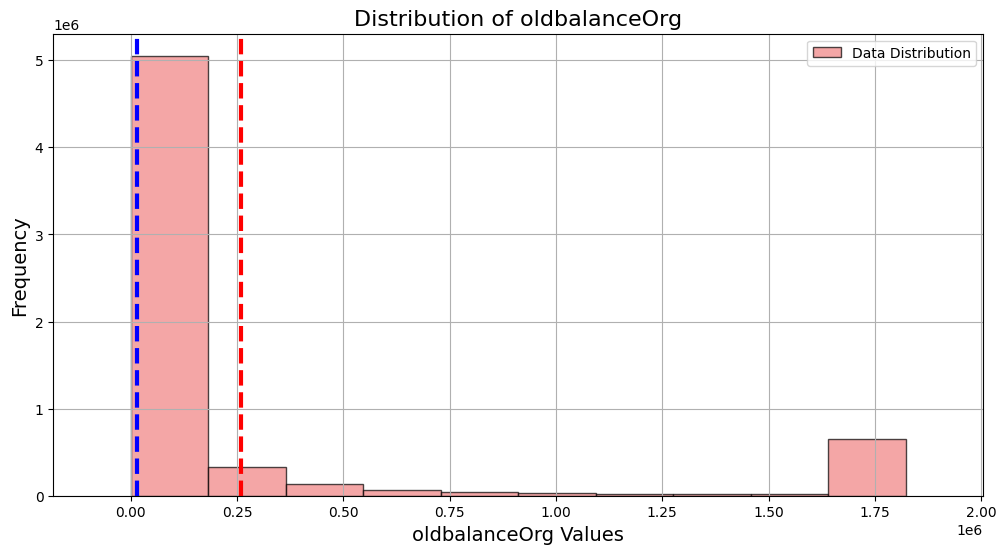

In [ ]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

The code cell calls the showPlot function that was defined earlier.

  It passes the column name 'oldbalanceOrg' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'lightcoral'.

This will generate and display a histogram showing the distribution of the 'oldbalanceOrg' column, with the mean and median values indicated by dashed lines, and the bars colored 'lightcoral'.

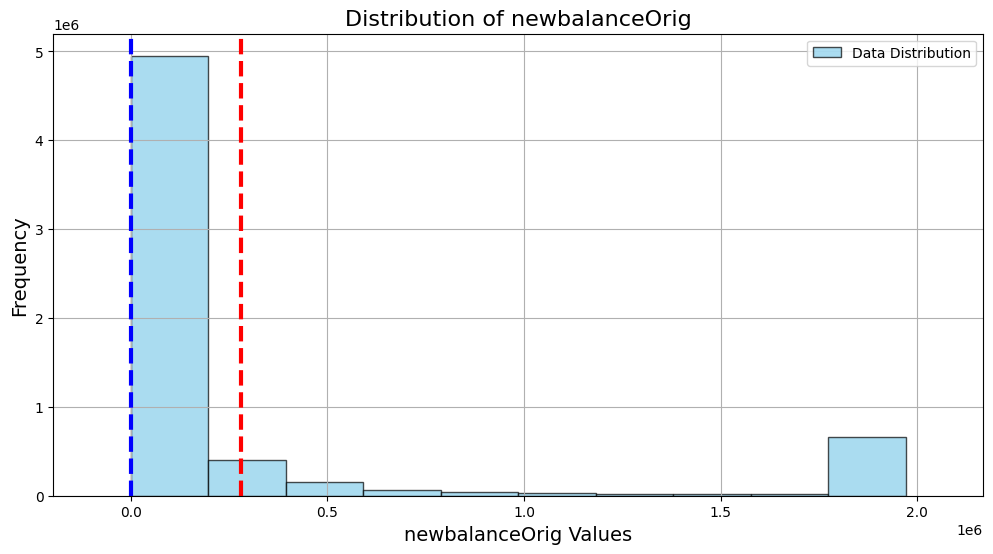

In [ ]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

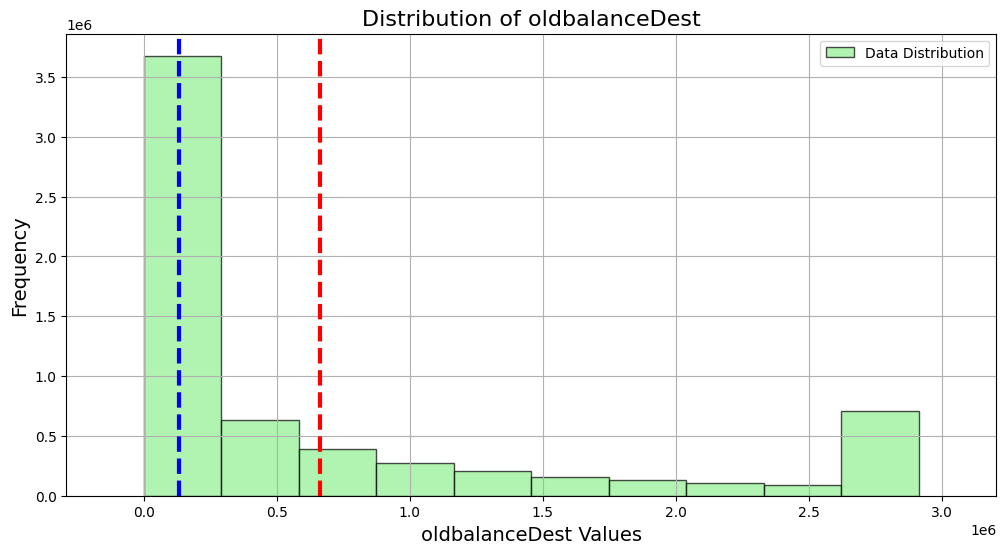

In [ ]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

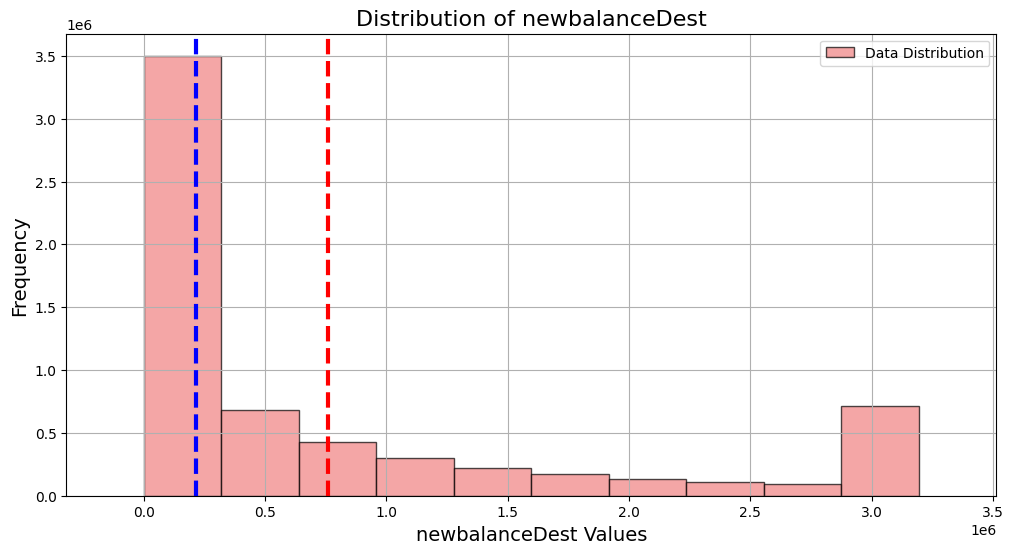

In [ ]:
showPlot('newbalanceDest', bins=10, color='lightcoral')


  It passes the column name 'newbalanceDest' as the feature argument.
  It sets the number of bins to 10.
  It sets the color of the histogram bars to 'lightcoral'.

This will generate and display a histogram showing the distribution of the 'newbalanceDest' column, with the mean and median values indicated by dashed lines, and the bars colored 'lightcoral'.

In [ ]:
df.type

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
6362615,CASH_OUT
6362616,TRANSFER
6362617,CASH_OUT
6362618,TRANSFER


The selected code cell accesses the 'type' column of the DataFrame df and displays its content. This allows you to see the values present in the 'type' column, which represents the type of transaction.

In [ ]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

The code cell uses the .unique() method on the type column of the DataFrame df. This method returns an array of the unique values present in the 'type' column. This is useful for understanding the different categories of transactions in the dataset.

The output shows that the unique transaction types are 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', and 'CASH_IN'.

In [ ]:
payment = df.type.value_counts()
payment

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


The selected code cell uses the .value_counts() method on the type column of the DataFrame df. This method returns a Series containing counts of unique values in the type column. The resulting Series is in descending order so that the first element is the most frequently-occurring element. This helps in understanding the distribution of the different transaction types in the dataset.

The output shows the number of occurrences for each transaction type: 'CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', and 'DEBIT'. 'CASH_OUT' is the most frequent transaction type, while 'DEBIT' is the least frequent.

<Axes: ylabel='type'>

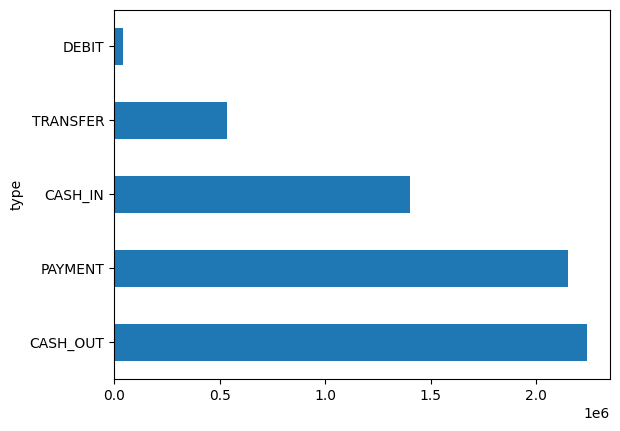

In [ ]:
payment.plot(kind='barh')

Certainly. The selected code cell uses the .plot(kind='barh') method on the payment Series (which holds the counts of each transaction type). This creates a horizontal bar chart where each bar's length corresponds to the frequency of a particular transaction type. It provides a visual summary of how often each type of transaction occurs in the dataset.

<Axes: xlabel='type', ylabel='count'>

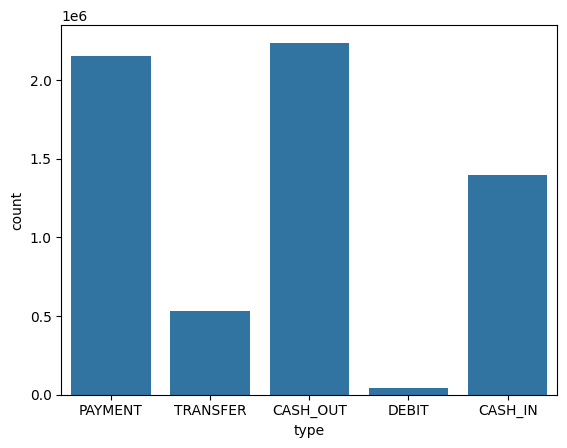

In [ ]:
sns.countplot(x='type', data=df)

The code cell uses the seaborn library to create a count plot of the 'type' column in the DataFrame df.

  sns.countplot(x='type', data=df): This function from seaborn automatically counts the occurrences of each unique value in the 'type' column and generates a bar plot.
        x='type': Specifies that the 'type' column should be on the x-axis.
        data=df: Indicates that the data is coming from the df DataFrame.

In [ ]:
CrosstabResult = pd.crosstab(index = df.type, columns = df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


The code cell uses the pd.crosstab() function to create a cross-tabulation (or contingency table) of the type column and the isFraud column from the DataFrame df.

Essentially, it counts how many times each unique combination of transaction type and isFraud status appears in the dataset.

  The rows of the resulting table represent the unique values in the type column.
  The columns of the resulting table represent the unique values in the isFraud column (0 for not fraud, 1 for fraud).

The values in the table cells are the counts of transactions that fall into each category combination. This clearly shows that fraudulent transactions (isFraud = 1) only occur for 'CASH_OUT' and 'TRANSFER' transaction types in this dataset.

In [ ]:
CrosstabResult[1]

,1
type,
CASH_IN,0
CASH_OUT,4116
DEBIT,0
PAYMENT,0
TRANSFER,4097


The selected code cell accesses the column with the label 1 from the CrosstabResult DataFrame. As we saw from the previous pd.crosstab output, the columns of CrosstabResult are the unique values from the isFraud column, which are 0 and 1. Therefore, accessing column 1 isolates the counts of transactions where isFraud is equal to 1 (fraudulent transactions) for each transaction type.

The output shows the number of fraudulent transactions for each type. It confirms that only 'CASH_OUT' and 'TRANSFER' transactions have fraudulent cases, with counts of 4116 and 4097 respectively, while the other types have 0 fraudulent transactions.

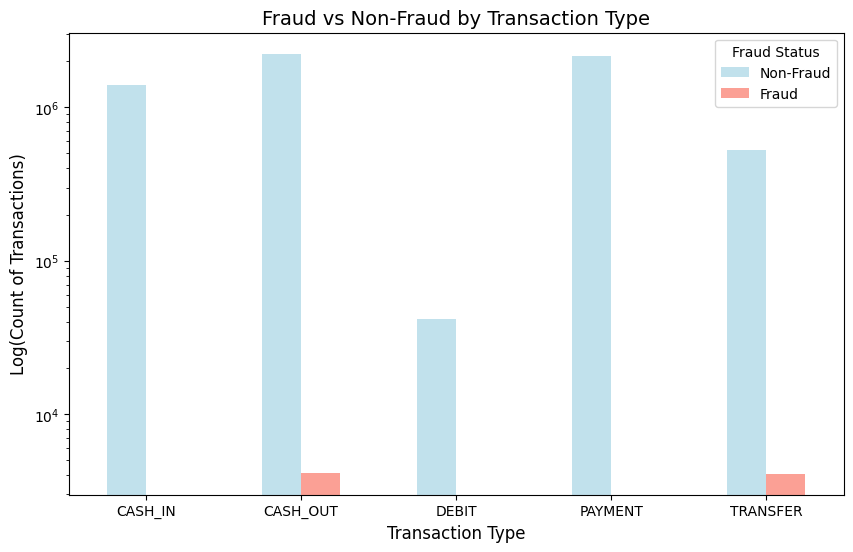

In [ ]:

# Adjusting the plot for better visibility
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Use logarithmic scale for better visibility of small values
plt.yscale('log')

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Log(Count of Transactions)', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Adding a legend
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

The selected code cell generates a bar plot to visualize the distribution of fraudulent and non-fraudulent transactions across different transaction types, using the CrosstabResult DataFrame created earlier.

Here's a breakdown:

  CrosstabResult.plot.bar(): This creates a bar plot directly from the CrosstabResult DataFrame. By default, it will create grouped bars for each transaction type, with one set of bars for non-fraudulent (0) and another for fraudulent (1) transactions.
  figsize=(10, 6): Sets the size of the figure for better readability.
  rot=0: Prevents the x-axis labels from rotating.
  color=['lightblue', 'salmon']: Specifies the colors for the bars representing non-fraudulent and fraudulent transactions.
  alpha=0.75: Sets the transparency of the bars.
  plt.yscale('log'): This is a crucial part. Since the number of non-fraudulent transactions is vastly larger than fraudulent ones (as seen in the CrosstabResult), a standard linear scale would make the fraudulent transaction bars almost invisible. Using a logarithmic scale (plt.yscale('log')) compresses the large values, making it possible to see the relative counts of both fraudulent and non-fraudulent transactions on the same plot.
  plt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels to the axes and a title to the plot for clarity.
  plt.legend(...): Adds a legend to identify which color corresponds to non-fraudulent and fraudulent transactions.
  plt.show(): Displays the generated plot.


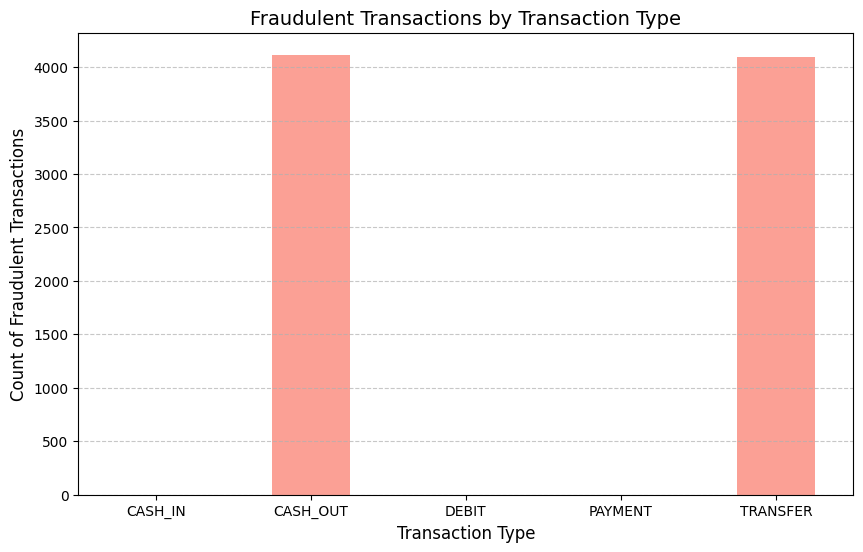

In [ ]:
# Plotting the fraud data only, maximizing visibility
CrosstabResult[1].plot.bar(figsize=(10, 6), rot=0, color=['salmon'], alpha=0.75)

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions by Transaction Type', fontsize=14)

# Adding gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


  CrosstabResult[1].plot.bar(...): It selects only the column labeled 1 from the CrosstabResult DataFrame (which contains the counts of fraudulent transactions) and creates a bar plot.
  figsize=(10, 6): Sets the figure size.
  rot=0: Prevents x-axis label rotation.
  color=['salmon']: Sets the color of the bars to salmon.
  alpha=0.75: Sets the transparency.
  plt.xlabel(...), plt.ylabel(...), plt.title(...): Sets the axis labels and title.
  plt.grid(axis='y', linestyle='--', alpha=0.7): Adds horizontal grid lines for better readability.
  plt.show(): Displays the plot.

This plot clearly shows the distribution of fraudulent transactions across the different transaction types, making it easier to see that 'CASH_OUT' and 'TRANSFER' have similar numbers of fraudulent cases, while other types have none.

Now that we've confirmed that fraud is limited to 'CASH_OUT' and 'TRANSFER', we can focus our analysis on these transaction types when investigating fraudulent activities

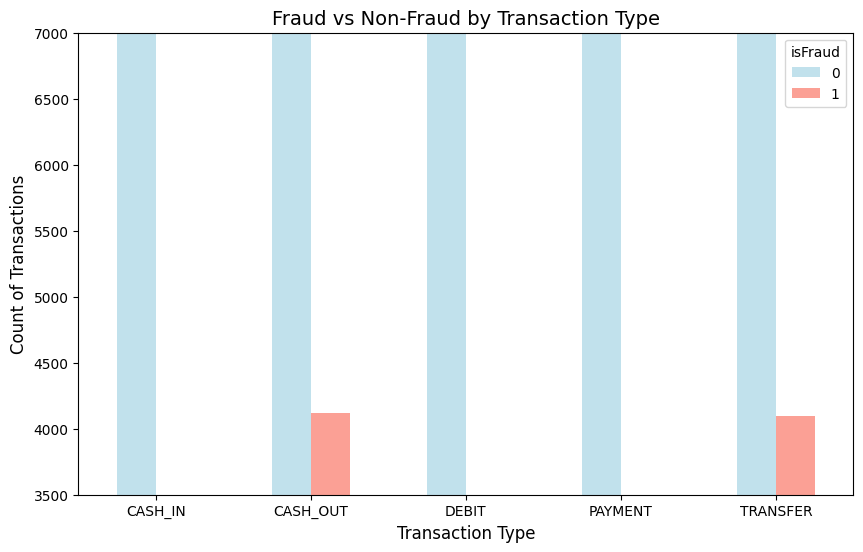

In [ ]:
# Plotting the grouped bar chart with customized y-axis limit to focus on fraudulent transactions
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Set the y-axis limit to zoom in on the range of interest (fraudulent transactions)
plt.ylim([3500, 7000])

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Show the plot
plt.show()

The selected code cell generates a grouped bar chart showing the counts of both fraudulent and non-fraudulent transactions for each transaction type, similar to a previous plot.

Here's a breakdown:

  CrosstabResult.plot.bar(): This creates a bar plot from the CrosstabResult DataFrame, with grouped bars for non-fraud (0) and fraud (1) for each transaction type.
  figsize=(10, 6): Sets the size of the figure.
  rot=0: Prevents x-axis label rotation.
  color=['lightblue', 'salmon']: Specifies the colors for the non-fraud and fraud bars.
  alpha=0.75: Sets the transparency.
  plt.ylim([3500, 7000]): This is the key difference from the previous grouped bar plot. It sets the y-axis limit to a specific range (3500 to 7000). This is done to "zoom in" on the lower counts, making the bars representing fraudulent transactions more visible and allowing for a better comparison of the number of fraudulent transactions between 'CASH_OUT' and 'TRANSFER'.
  plt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels and a title.
  plt.show(): Displays the plot.

This plot provides a focused view on the fraudulent transactions within the 'CASH_OUT' and 'TRANSFER' types, making it easier to visually compare their counts without being overwhelmed by the much larger counts of non-fraudulent transactions.

In [ ]:
# Calculating the fraud percentage for 'cashout' and 'transfer' transaction types
cashout_fraud = CrosstabResult.loc['CASH_OUT', 1]  # Fraudulent cashout transactions
cashout_total = CrosstabResult.loc['CASH_OUT'].sum()  # Total cashout transactions
cashout_fraud_percentage = (cashout_fraud / cashout_total) * 100

transfer_fraud = CrosstabResult.loc['TRANSFER', 1]  # Fraudulent transfer transactions
transfer_total = CrosstabResult.loc['TRANSFER'].sum()  # Total transfer transactions
transfer_fraud_percentage = (transfer_fraud / transfer_total) * 100

# Displaying the fraud percentages
print(f"Fraud Percentage in Cashout Transactions: {cashout_fraud_percentage:.2f}%")
print(f"Fraud Percentage in Transfer Transactions: {transfer_fraud_percentage:.2f}%")


Fraud Percentage in Cashout Transactions: 0.18%
Fraud Percentage in Transfer Transactions: 0.77%


The selected code cell calculates and prints the percentage of fraudulent transactions specifically for the 'CASH_OUT' and 'TRANSFER' transaction types.

Here's a breakdown:

  Accessing Fraud and Total Counts:
        cashout_fraud = CrosstabResult.loc['CASH_OUT', 1]: This retrieves the count of fraudulent ('isFraud' = 1) 'CASH_OUT' transactions from the CrosstabResult DataFrame.
        cashout_total = CrosstabResult.loc['CASH_OUT'].sum(): This calculates the total number of 'CASH_OUT' transactions by summing the counts of both non-fraudulent (0) and fraudulent (1) transactions for 'CASH_OUT'.
        Similarly, transfer_fraud and transfer_total are calculated for 'TRANSFER' transactions.
   Calculating Fraud Percentage:
        cashout_fraud_percentage = (cashout_fraud / cashout_total) * 100: This calculates the percentage of fraudulent transactions out of the total 'CASH_OUT' transactions.
        transfer_fraud_percentage = (transfer_fraud / transfer_total) * 100: This calculates the percentage of fraudulent transactions out of the total 'TRANSFER' transactions.
  Displaying Results:
        print(f"Fraud Percentage in Cashout Transactions: {cashout_fraud_percentage:.2f}%"): This prints the calculated fraud percentage for 'CASH_OUT' transactions, formatted to two decimal places.
        print(f"Fraud Percentage in Transfer Transactions: {transfer_fraud_percentage:.2f}%"): This prints the calculated fraud percentage for 'TRANSFER' transactions, formatted to two decimal places.

The output shows that approximately 0.18% of 'CASH_OUT' transactions and 0.77% of 'TRANSFER' transactions in this dataset are fraudulent. This highlights that while the absolute number of fraudulent transactions is similar for these two types (as seen in previous plots), the proportion of fraudulent transactions is higher for 'TRANSFER' compared to 'CASH_OUT'.

In [ ]:
cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984


  cashout = 2233384 + 4116: This line calculates the total number of 'CASH_OUT' transactions by adding the non-fraudulent count (2233384) and the fraudulent count (4116) for 'CASH_OUT' from the CrosstabResult table.
  cashout_fraud = 4116 / (cashout) * 100: This line calculates the percentage of fraudulent 'CASH_OUT' transactions by dividing the number of fraudulent 'CASH_OUT' transactions (4116) by the total number of 'CASH_OUT' transactions (cashout) and multiplying by 100.
  cashout_fraud: This line displays the calculated percentage of fraudulent 'CASH_OUT' transactions.

The output shows that approximately 0.18% of 'CASH_OUT' transactions are fraudulent.

In [ ]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811


  transfer = 528812 + 4097: This line calculates the total number of 'TRANSFER' transactions by adding the non-fraudulent count (528812) and the fraudulent count (4097) for 'TRANSFER' from the CrosstabResult table.
  transfer_fraud = 4097 / (transfer) * 100: This line calculates the percentage of fraudulent 'TRANSFER' transactions by dividing the number of fraudulent 'TRANSFER' transactions (4097) by the total number of 'TRANSFER' transactions (transfer) and multiplying by 100.
  transfer_fraud: This line displays the calculated percentage of fraudulent 'TRANSFER' transactions.

The output shows that approximately 0.77% of 'TRANSFER' transactions are fraudulent.

We have now explored the distribution of transaction types and the percentage of fraud within 'CASH_OUT' and 'TRANSFER' transactions. What would you like to do next? We could:

  Analyze other features: Investigate the characteristics of fraudulent transactions based on 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', or 'newbalanceDest'.
  Explore the 'isFlaggedFraud' column: Although it has very few flagged cases, we could see if there's any pattern.
  Prepare for modeling: Discuss steps like feature engineering, encoding categorical variables, or splitting the data for training and testing a fraud detection model.


In [ ]:
df.amount

,amount
0,9839.640
1,4501.300
2,4501.300
3,4501.300
4,11668.140
...,...
6362615,339682.130
6362616,365423.309
6362617,365423.309
6362618,365423.309


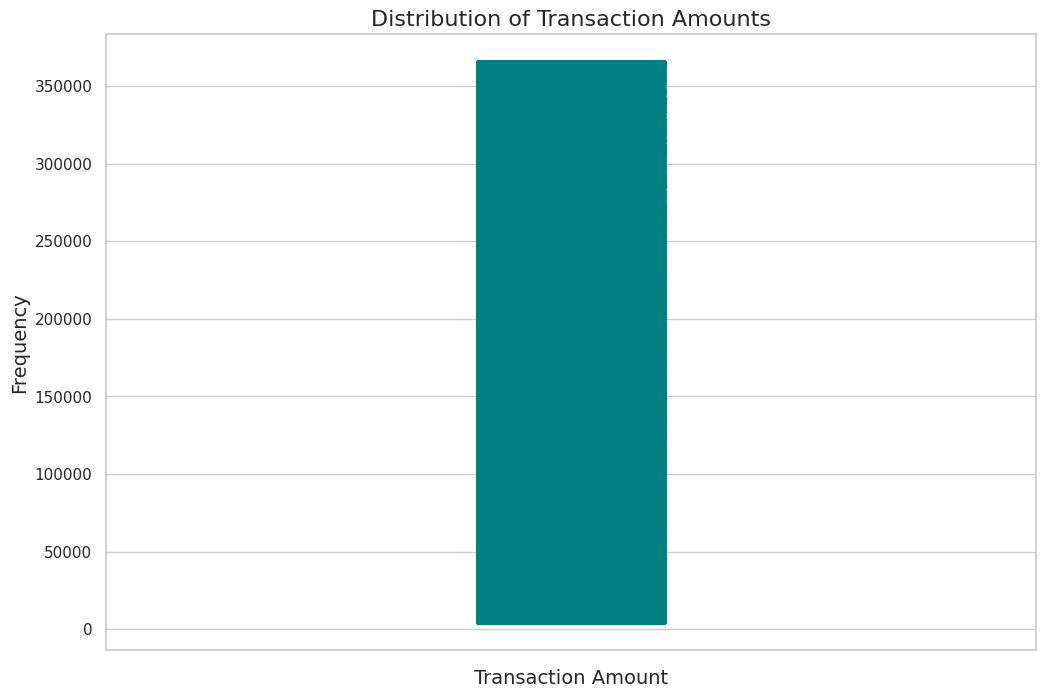

In [ ]:
# Improved Strip Plot for Amount with customization
plt.figure(figsize=(12, 8))

# Set the style and color palette
sns.set(style="whitegrid")
sns.stripplot(y=df.amount, color='teal', jitter=True, size=3, edgecolor='black')

# Adding labels and title
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Transaction Amounts', fontsize=16)

# Displaying the plot
plt.show()


  plt.figure(figsize=(12, 8)): Sets the size of the plot figure.
  sns.set(style="whitegrid"): Sets the style of the plot to 'whitegrid' using seaborn for better visual appearance.
  sns.stripplot(y=df.amount, color='teal', jitter=True, size=3, edgecolor='black'): This is the core plotting function from seaborn.
        y=df.amount: Specifies that the 'amount' column should be plotted on the y-axis. A strip plot is useful for visualizing the distribution of a single numerical variable, especially when there might be overlapping points.
        color='teal': Sets the color of the data points to teal.
        jitter=True: Adds a small amount of random noise to the horizontal position of the points to help visualize overlapping data points that would otherwise be plotted directly on top of each other.
        size=3: Sets the size of the markers.
        edgecolor='black': Sets the color of the edge of the markers to black.
  plt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels to the axes and a title to the plot.
  plt.show(): Displays the generated plot.


/tmp/ipython-input-42-2659402195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)


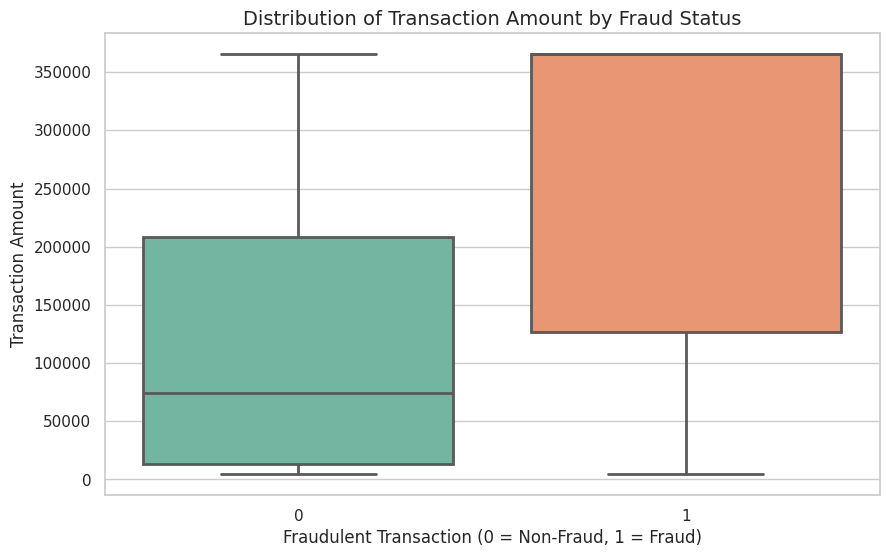

In [ ]:
# Improved Boxplot for 'Amount' by 'isFraud' column
plt.figure(figsize=(10, 6))

# Set the style and color palette
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)

# Adding labels and title
plt.xlabel('Fraudulent Transaction (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Distribution of Transaction Amount by Fraud Status', fontsize=14)

# Displaying the plot
plt.show()


  plt.figure(figsize=(10, 6)): Sets the size of the plot figure.
  sns.set(style="whitegrid"): Sets the style of the plot to 'whitegrid' for better visual appearance.
  sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2): This is the core plotting function from seaborn.
        x='isFraud': Specifies that the isFraud column should be on the x-axis. This will create separate boxplots for each unique value in isFraud (0 and 1).
        y='amount': Specifies that the 'amount' column should be on the y-axis. The boxplot will show the distribution of transaction amounts for each isFraud category.
        data=df: Indicates that the data is coming from the df DataFrame.
        palette='Set2': Sets the color palette for the boxplots.
        showfliers=False: This is important. It prevents the plotting of individual data points that are considered outliers by the boxplot calculation. This is useful here because the 'amount' column had significant outliers, and we capped them earlier. Hiding the remaining extreme values helps to focus on the main distribution.
        linewidth=2: Sets the width of the box lines.
  plt.xlabel(...), plt.ylabel(...), plt.title(...): Adds labels to the axes and a title to the plot.
   plt.show(): Displays the generated plot.


In [ ]:
total_transactions = df.shape[0]
fraud_transaction = df[df.isFraud==1].shape[0]
fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [ ]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362619,743,CASH_OUT,365423.309,C1280323807,850002.520,0.0,C873221189,2914266.669,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.0,C2080388513,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.0,C1365125890,68488.840,3194869.671,1,0
6362601,742,CASH_OUT,365423.309,C1614818636,652993.910,0.0,C362803701,0.000,652993.910,1,0
6362600,742,TRANSFER,365423.309,C40604503,652993.910,0.0,C1166857907,0.000,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1030453,65,TRANSFER,4501.300,C270115029,215.830,0.0,C1574358644,0.000,0.000,1,0
6202688,583,TRANSFER,4501.300,C469202951,1583.280,0.0,C1107076598,0.000,0.000,1,0
251,1,TRANSFER,4501.300,C1420196421,2806.000,0.0,C972765878,0.000,0.000,1,0
3,1,CASH_OUT,4501.300,C840083671,181.000,0.0,C38997010,21182.000,0.000,1,0



  Filtering Fraudulent Transactions:
        fraud_amount = df[df.isFraud == 1]: This line filters the original DataFrame df to select only the rows where the isFraud column is equal to 1. This creates a new DataFrame called fraud_amount that contains only the fraudulent transactions.
  Sorting by Amount:
        fraud_amount = fraud_amount.sort_values(by=['amount'], ascending=False): This line sorts the fraud_amount DataFrame in descending order based on the values in the 'amount' column. This arranges the fraudulent transactions from the largest amount to the smallest amount.

Finally, the code displays the fraud_amount DataFrame, showing the fraudulent transactions sorted by their amount in descending order. This allows you to easily inspect the fraudulent transactions with the largest amounts.

We have now filtered and sorted the fraudulent transactions by amount. What would you like to do next? We could:

  Analyze the top fraudulent transactions: Look at the details of the transactions with the highest amounts.
  Explore other characteristics of fraudulent transactions: Investigate the balances ('oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest') associated with fraudulent transactions.
  Visualize the distribution of amounts for fraudulent transactions: See the range and spread of amounts in fraudulent cases.
  Proceed with feature engineering or modeling: If you are ready to build a fraud detection model.


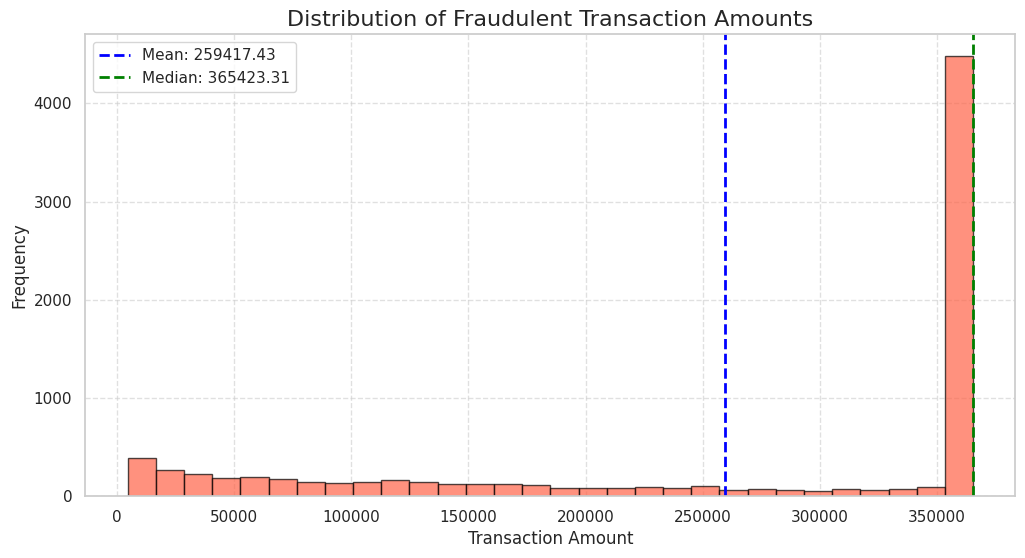

In [ ]:

# Improved histogram plot
plt.figure(figsize=(12, 6))
plt.hist(fraud_amount['amount'], bins=30, color='tomato', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: Add a vertical line for the mean and median values
mean_value = fraud_amount['amount'].mean()
median_value = fraud_amount['amount'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Show the legend
plt.legend()

# Display the plot
plt.show()


  plt.figure(figsize=(12, 6)): Sets the size of the plot figure for better readability.
  plt.hist(fraud_amount['amount'], bins=30, color='tomato', edgecolor='black', alpha=0.7): This is the core plotting function.
        fraud_amount['amount']: Specifies the data to be plotted (the 'amount' column from the fraud_amount DataFrame, which only contains fraudulent transactions).
        bins=30: Sets the number of bins for the histogram to 30, allowing for a more detailed view of the distribution.
        color='tomato': Sets the color of the histogram bars to tomato.
        edgecolor='black': Sets the color of the edges of the bars to black.
        alpha=0.7: Sets the transparency of the bars.
  plt.title(...), plt.xlabel(...), plt.ylabel(...): Adds a title and labels to the axes.
  plt.grid(True, linestyle='--', alpha=0.6): Adds grid lines to the plot for better readability.
  Mean and Median Lines:
        mean_value = fraud_amount['amount'].mean(): Calculates the mean of the fraudulent transaction amounts.
        median_value = fraud_amount['amount'].median(): Calculates the median of the fraudulent transaction amounts.
        plt.axvline(...): Draws vertical dashed lines to indicate the mean (blue) and median (green) values on the histogram, with labels showing their values.
  plt.legend(): Displays the legend for the mean and median lines.
  plt.show(): Displays the generated plot.

This histogram provides a visual representation of the distribution of amounts involved in fraudulent transactions. The mean and median lines give an idea of the central tendency of these fraudulent amounts.

In [ ]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

The selected code cell filters the DataFrame to find transactions that are both fraudulent (isFraud == 1) and flagged as fraud (isFlaggedFraud == 1).

Here's a breakdown:

  df[(df.isFraud == 1) & (df.isFlaggedFraud == 1)]: This uses boolean indexing to select rows from the original df DataFrame.
        (df.isFraud == 1): This condition selects rows where the 'isFraud' column is equal to 1 (fraudulent transactions).
        (df.isFlaggedFraud == 1): This condition selects rows where the 'isFlaggedFraud' column is equal to 1 (flagged as fraud).
        &: This is the logical AND operator, meaning that a row will only be selected if both conditions are true.
  flagged_fraud_records = ...: The resulting filtered DataFrame is assigned to the variable flagged_fraud_records.

Finally, the code displays the flagged_fraud_records DataFrame, showing the transactions that were both actually fraudulent and flagged as fraudulent by the system.

As you can see from the output, there are only 16 such records. This confirms that while the isFlaggedFraud column does identify some fraudulent transactions, it misses a large number of them (since there are 8213 fraudulent transactions in total, as seen in a previous output).

In [ ]:
# We can get the total number of flagged fraud transactions from the value_counts() output of isFlaggedFraud
total_isflaggedFraud = df.isFlaggedFraud.value_counts()[1]

# We already calculated total_fraud in a previous cell
# total_fraud = df[df.isFraud==1].shape[0] # This was calculated as fraud_transaction

flagged_percent = total_isflaggedFraud / fraud_transaction * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))
unflagged_percent= (fraud_transaction - total_isflaggedFraud)/fraud_transaction * 100
print('Percentage of unflagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.195
Percentage of unflagged fraud:  99.805


In [ ]:
fraudster= df.nameDest.value_counts()
fraudster

The selected code cell uses the .value_counts() method on the nameDest column of the DataFrame df. This method returns a Series containing the counts of unique values in the nameDest column. The resulting Series is in descending order by count.

In [ ]:
fraudster[:10]

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


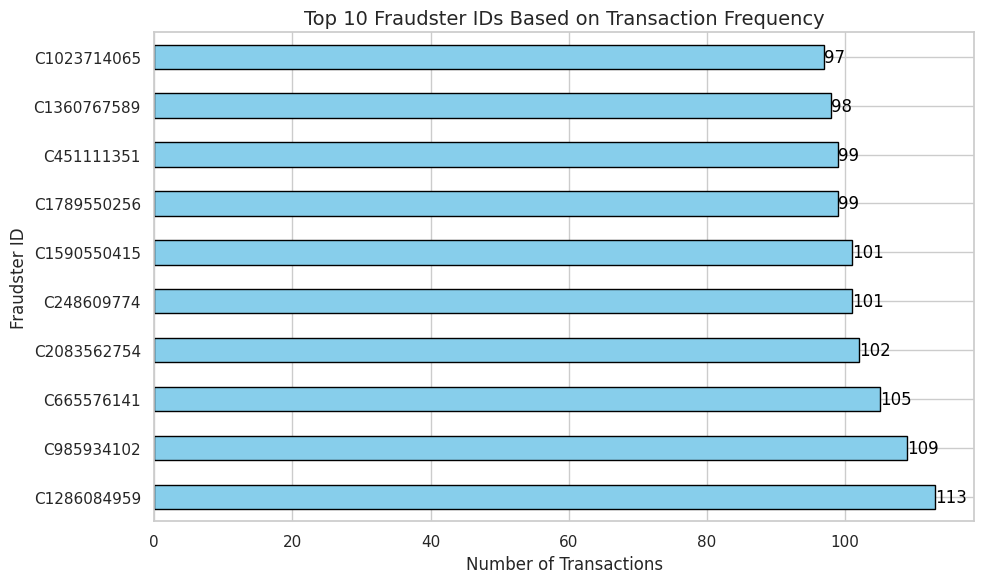

In [ ]:

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart with custom color
fraudster[:10].plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 Fraudster IDs Based on Transaction Frequency', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Fraudster ID', fontsize=12)

# Display the value on the bars
for index, value in enumerate(fraudster[:10]):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

The selected code cell generates a horizontal bar chart to visualize the top 10 destination accounts (nameDest) based on the number of transactions they are involved in, using the fraudster Series which contains the value counts of the nameDest column.

Here's a breakdown:

  plt.figure(figsize=(10, 6)): Sets the size of the plot figure.
  fraudster[:10].plot(kind='barh', color='skyblue', edgecolor='black'): This is the core plotting part.
        fraudster[:10]: This selects the top 10 entries from the fraudster Series (which are the destination accounts with the highest transaction counts).
        .plot(kind='barh', ...): This generates a horizontal bar plot from the selected data.
        color='skyblue', edgecolor='black': Sets the color and edge color of the bars.
  plt.title(...), plt.xlabel(...), plt.ylabel(...): Adds a title and labels to the axes.
  Displaying Values on Bars:
        for index, value in enumerate(fraudster[:10]):: This loop iterates through the top 10 destination accounts and their transaction counts.
        plt.text(value, index, str(value), ...): This adds the transaction count (value) as text on each bar at the appropriate position.
  plt.tight_layout(): Adjusts the plot layout to prevent labels from overlapping.
  plt.show(): Displays the generated plot.


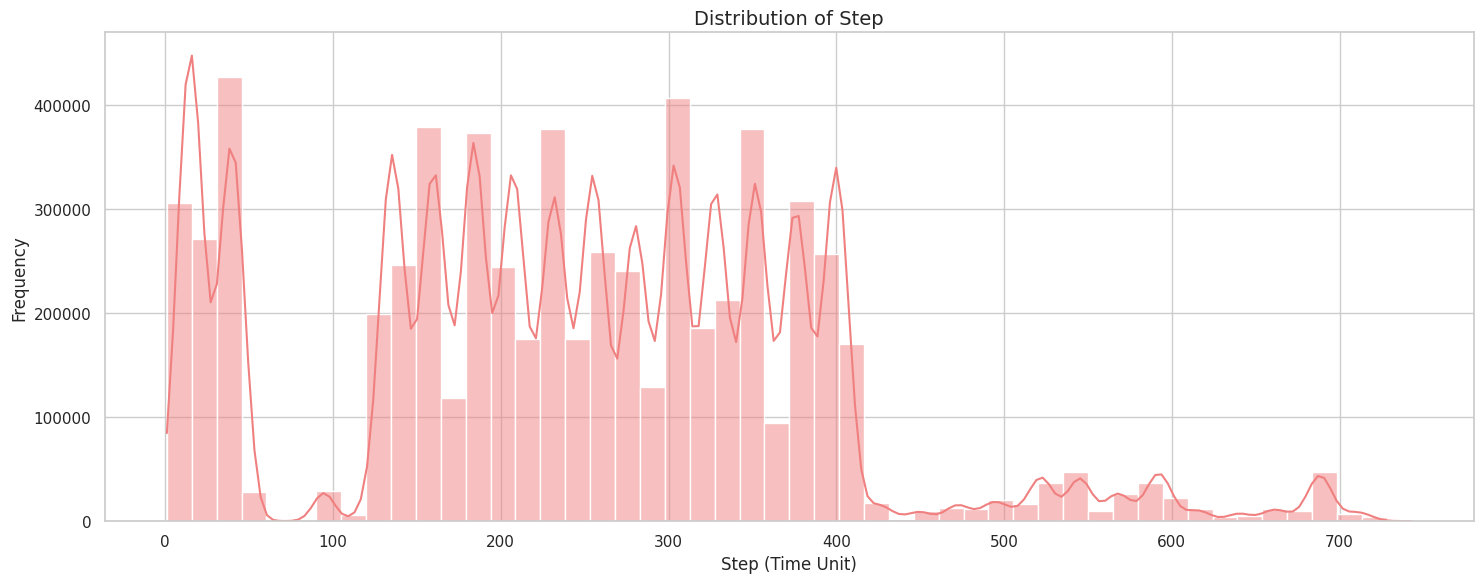

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Plot the distribution using sns.histplot
sns.histplot(df['step'], bins=50, color='lightcoral', kde=True)

# Add title and labels
plt.title('Distribution of Step', fontsize=14)
plt.xlabel('Step (Time Unit)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



  import seaborn as sns and import matplotlib.pyplot as plt: These lines import the necessary libraries for plotting.
  plt.figure(figsize=(15, 6)): Sets the size of the plot figure.
  sns.histplot(df['step'], bins=50, color='lightcoral', kde=True): This is the core plotting function from seaborn.
        df['step']: Specifies the data to be plotted (the 'step' column).
        bins=50: Sets the number of bins for the histogram to 50, providing a more detailed view of the distribution.
        color='lightcoral': Sets the color of the histogram bars.
        kde=True: This adds a Kernel Density Estimate (KDE) line to the plot, which provides a smoothed representation of the distribution.
  plt.title(...), plt.xlabel(...), plt.ylabel(...): Adds a title and labels to the axes.
  plt.tight_layout(): Adjusts the plot layout to prevent labels from overlapping.
  plt.show(): Displays the generated plot.

This histogram with the KDE line helps to visualize the frequency of transactions over time (represented by the 'step' column) and understand the overall shape of the distribution.

We have now explored the distribution of the 'step' column. What would you like to do next? We could:

   Analyze other features: Investigate the patterns in 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', or 'newbalanceDest' in relation to fraud.
   Engineer new features: Create new columns that might be helpful for detecting fraud.
  Prepare the data for modeling: Discuss steps like encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.
  Build a fraud detection model: Choose and train a machine learning model to predict fraudulent transactions.


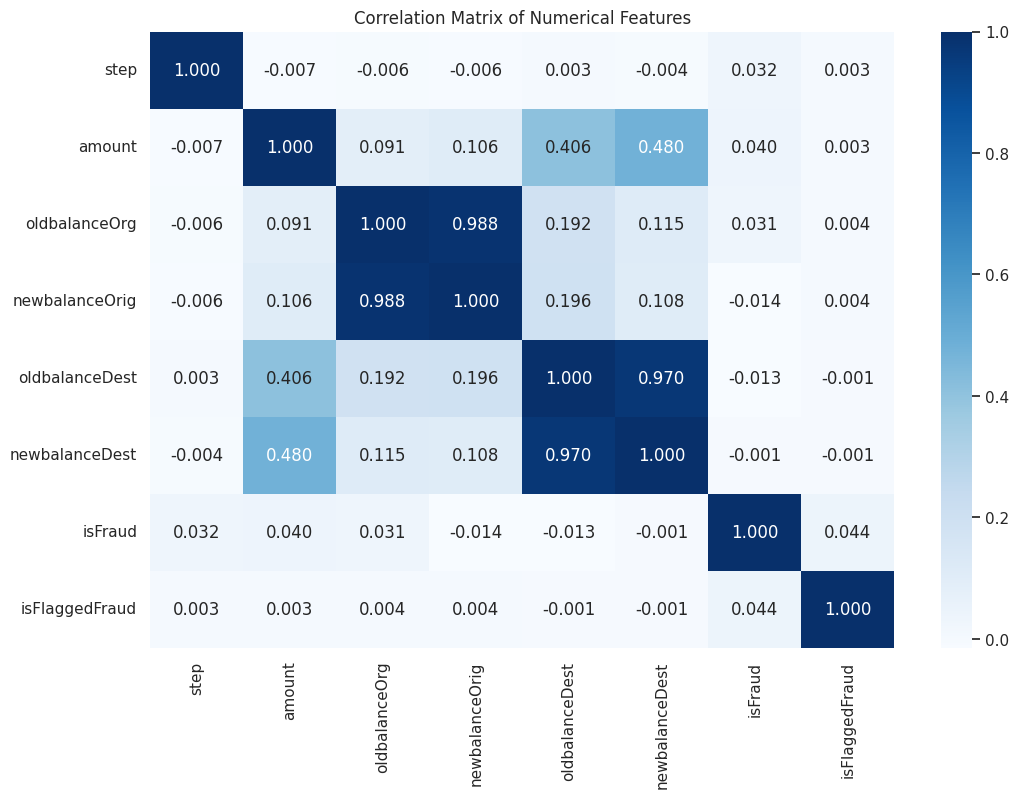

In [ ]:
df_plot = df.select_dtypes(include=['float64', 'int64'])
corr = df_plot.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


  df_plot = df.select_dtypes(include=['float64', 'int64']): This line creates a new DataFrame df_plot containing only the columns from the original df that have a data type of float64 or int64. This is done because correlation can only be calculated between numerical features.
  corr = df_plot.corr(): This line calculates the pairwise correlation between all columns in the df_plot DataFrame. The result is a correlation matrix, where each cell shows the correlation coefficient between two columns. The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the linear relationship between the two variables.
  import seaborn as sns and import matplotlib.pyplot as plt: These lines import the necessary libraries for plotting.
  plt.figure(figsize=(12, 8)): Sets the size of the plot figure.
  sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', fmt=".3f"): This line generates a heatmap of the correlation matrix using seaborn.
        corr: The correlation matrix to be plotted.
        xticklabels=corr.columns, yticklabels=corr.columns: Sets the labels for the x and y axes to the column names of the correlation matrix.
        annot=True: Displays the correlation coefficient values on the heatmap cells.
        cmap='Blues': Sets the color map for the heatmap to shades of blue.
        fmt=".3f": Formats the annotation values to three decimal places.
   plt.title('Correlation Matrix of Numerical Features'): Adds a title to the heatmap.
  plt.show(): Displays the generated heatmap.

The heatmap is a useful visualization for quickly identifying which pairs of numerical features have strong positive or negative correlations. This can provide insights into the relationships between variables and inform feature selection or engineering steps for a machine learning model.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Check again for missing values to ensure all have been imputed
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Missing Values After Imputation:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64



  import pandas as pd and from sklearn.impute import SimpleImputer: Imports the necessary libraries.
  missing_values = df.isnull().sum(): This checks and prints the number of missing values in each column before imputation.
  Impute numerical columns with median:
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns: Identifies the numerical columns.
        imputer_num = SimpleImputer(strategy='median'): Creates a SimpleImputer object that will fill missing values with the median of the column.
        df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols]): Applies the median imputation to the numerical columns. fit_transform calculates the median from the data (fit) and then fills the missing values (transform).
  Impute categorical columns with the mode:
        categorical_cols = df.select_dtypes(include=['object']).columns: Identifies the categorical columns (those with 'object' dtype).
        imputer_cat = SimpleImputer(strategy='most_frequent'): Creates a SimpleImputer object that will fill missing values with the most frequent value (mode) of the column.
        df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols]): Applies the mode imputation to the categorical columns.
  missing_values_after_imputation = df.isnull().sum(): This checks and prints the number of missing values after imputation to confirm that all missing values have been handled.

The output shows that there were initially no missing values in the dataset, and after running the imputation code, there are still no missing values. While this code is prepared to handle missing values, it turns out the dataset was already complete in this case.

In [ ]:
# Drop 'nameDest' and 'nameOrig' columns as they have high cardinality and are not useful for fraud detection
df.drop(columns=['nameDest', 'nameOrig'], inplace=True)

# 'isFlaggedFraud' is not useful and is highly imbalanced, so we drop it
df.drop(columns=['isFlaggedFraud'], inplace=True)

# Create new features for balance differences instead of using old and new balance columns
df['balance_diff_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop original balance columns as their information is now captured in the balance_diff_* columns
df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], inplace=True)

# Display remaining columns for confirmation
print("Remaining columns after cleaning:", df.columns)


Remaining columns after cleaning: Index(['step', 'type', 'amount', 'isFraud', 'balance_diff_org',
       'balance_diff_dest'],
      dtype='object')


In [ ]:
# Apply One-Hot Encoding to the 'type' column
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Display the first few rows to confirm the encoding
print(df_encoded.head())

   step    amount  isFraud  balance_diff_org  balance_diff_dest  \
0   1.0   9839.64      0.0          -9839.64                0.0   
1   1.0   4501.30      0.0          -1864.28                0.0   
2   1.0   4501.30      1.0           -181.00                0.0   
3   1.0   4501.30      1.0           -181.00           -21182.0   
4   1.0  11668.14      0.0         -11668.14                0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False  



  df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True): This line uses the pd.get_dummies() function to apply one-hot encoding.
        df: The input DataFrame.
        columns=['type']: Specifies the column(s) to be encoded. In this case, it's the 'type' column.
        drop_first=True: This argument is important. It drops the first category of the 'type' column after encoding. For example, if you have 'CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', and 'DEBIT', it will create new columns for 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', and 'type_TRANSFER', but not 'type_CASH_IN'. This is done to avoid multicollinearity, where one category can be perfectly predicted from the others.
  df_encoded = ...: The resulting DataFrame with the new encoded columns is assigned to df_encoded.
  print(df_encoded.head()): This displays the first few rows of the df_encoded DataFrame to show the result of the encoding.

The output shows the original columns along with new boolean columns for each transaction type (except one, due to drop_first=True). A True value in one of these new columns indicates that the transaction was of that specific type.

We have now encoded the categorical 'type' column. This is an important step in preparing the data for a machine learning model. What would you like to do next? We could:

  Continue feature engineering: Create other potentially useful features.
  Scale numerical features: Prepare the numerical data for algorithms sensitive to feature scaling.
  Split the data: Divide the data into training and testing sets.
  Build a fraud detection model: Choose and train a machine learning model.


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['isFraud'])  # drop target column
y = df_encoded['isFraud']  # target column

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the data
X_res, y_res = smote.fit_resample(X, y)

# Verify the new distribution of the classes
print('Class distribution after SMOTE: ', y_res.value_counts())

Class distribution after SMOTE:  isFraud
0.0    6354407
1.0    6354407
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Further split the 20% temporary data into validation and test sets (50% of 20% for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shape of the splits and the class distribution for each set
print(f"Training set shape: {X_train.shape}, Class distribution: {y_train.value_counts()}")
print(f"Validation set shape: {X_val.shape}, Class distribution: {y_val.value_counts()}")
print(f"Test set shape: {X_test.shape}, Class distribution: {y_test.value_counts()}")


Training set shape: (10167051, 8), Class distribution: isFraud
1.0    5083526
0.0    5083525
Name: count, dtype: int64
Validation set shape: (1270881, 8), Class distribution: isFraud
0.0    635441
1.0    635440
Name: count, dtype: int64
Test set shape: (1270882, 8), Class distribution: isFraud
0.0    635441
1.0    635441
Name: count, dtype: int64



  from sklearn.model_selection import train_test_split: Imports the necessary function for splitting data.
  X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res): This performs the first split.
        X_res and y_res: These are the features and target variables after applying SMOTE (Synthetic Minority Over-sampling Technique) to handle the class imbalance.
        test_size=0.2: Specifies that 20% of the data will be allocated to a temporary test set (X_temp, y_temp), and the remaining 80% will be for the training set (X_train, y_train).
        random_state=42: Sets a random seed for reproducibility of the split.
        stratify=y_res: This is important for imbalanced datasets. It ensures that the proportion of classes (fraudulent vs. non-fraudulent) is the same in both the training and temporary test sets as it was in the original y_res.
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp): This performs the second split on the temporary 20% data.
        test_size=0.5: Splits the X_temp and y_temp into two equal halves: a validation set (X_val, y_val) and the final test set (X_test, y_test). This results in an 80/10/10 split of the original SMOTE'd data.
        random_state=42 and stratify=y_temp: Ensures reproducibility and maintains class proportions in the validation and test sets.
   print(...): These lines print the shapes of the resulting training, validation, and test sets, as well as the class distribution within each set. This confirms that the splitting was done correctly and that the class balance is maintained in each subset.

This splitting process provides distinct datasets for training the model, tuning hyperparameters (validation set), and evaluating the final model's performance (test set) on unseen data, which is crucial for building a reliable fraud detection model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Initialize the Neural Network model
model = Sequential()

# Input Layer (First Hidden Layer)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Additional Hidden Layers
model.add(Dense(64, activation='relu'))  # Second Hidden Layer
model.add(Dropout(0.2))  # Dropout layer for regularization

model.add(Dense(32, activation='relu'))  # Third Hidden Layer
model.add(Dropout(0.2))  # Dropout layer for regularization

# Output Layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to verify architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)


  from keras.models import Sequential and from keras.layers import Dense, Dropout: Imports the necessary components from Keras.
  model = Sequential(): Initializes a Sequential model, where layers are added one after another in sequence.
  Input Layer (First Hidden Layer):
        model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')): Adds the first dense (fully connected) layer.
            128: The number of neurons (units) in this layer.
            input_dim=X_train.shape[1]: Specifies the number of input features, which is determined by the number of columns in the training data X_train.
            activation='relu': Uses the Rectified Linear Unit (ReLU) activation function, which is common for hidden layers.
  Dropout Layer:
        model.add(Dropout(0.2)): Adds a dropout layer. Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting. 0.2 means 20% of the neurons will be randomly dropped.
  Additional Hidden Layers:
        model.add(Dense(64, activation='relu')): Adds a second dense layer with 64 neurons and ReLU activation.
        model.add(Dropout(0.2)): Adds another dropout layer.
        model.add(Dense(32, activation='relu')): Adds a third dense layer with 32 neurons and ReLU activation.
        model.add(Dropout(0.2)): Adds a third dropout layer.
   Output Layer:
        model.add(Dense(1, activation='sigmoid')): Adds the output layer.
            1: The number of neurons is 1 because this is a binary classification problem (outputting a single value representing the probability of being fraudulent).
            activation='sigmoid': Uses the sigmoid activation function, which squashes the output value between 0 and 1, representing the probability of the positive class (fraud).
  Compile the model:
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']): Configures the model for training.
            optimizer=Adam(learning_rate=0.001): Uses the Adam optimizer with a learning rate of 0.001 to update the model's weights during training.
            loss='binary_crossentropy': Specifies the binary cross-entropy loss function, which is standard for binary classification problems.
            metrics=['accuracy']: Defines the metric to evaluate the model's performance during training and testing (in this case, accuracy).
  Summary of the model:
        model.summary(): Prints a summary of the model's architecture, including the layers, output shapes, and number of parameters.

This code sets up the structure of a neural network for fraud detection.

In [ ]:
from keras.callbacks import EarlyStopping

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=2,         # Stop after 2 epochs of no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model with the early stopping callback
history = model.fit(
    X_train, y_train,        # Training data
    epochs=5,              # Maximum number of epochs
    batch_size=32,           # Batch size
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping],   # Apply the early stopping callback
    verbose=1                # Show training progress
)


Epoch 1/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 1037s 3ms/step - accuracy: 0.7077 - loss: 16.0525 - val_accuracy: 0.9448 - val_loss: 0.2136
Epoch 2/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 936s 3ms/step - accuracy: 0.9278 - loss: 0.2591 - val_accuracy: 0.9626 - val_loss: 0.1458
Epoch 3/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 888s 3ms/step - accuracy: 0.9339 - loss: 0.2615 - val_accuracy: 0.9387 - val_loss: 0.1781
Epoch 4/5
317721/317721 ━━━━━━━━━━━━━━━━━━━━ 912s 3ms/step - accuracy: 0.9427 - loss: 0.2114 - val_accuracy: 0.9426 - val_loss: 0.1588


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels

# Generate Classification Report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate classification report
print("Classification Report:\n", report)

# Generate confusion matrix
print("Confusion Matrix:\n", cm)

39716/39716 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step
Classification Report:
 {'0.0': {'precision': 0.9934384809353562, 'recall': 0.9318567734848712, 'f1-score': 0.9616627635421099, 'support': 635441.0}, '1.0': {'precision': 0.9358343051815936, 'recall': 0.9938452193043886, 'f1-score': 0.9639677868412055, 'support': 635441.0}, 'accuracy': 0.9628509963946299, 'macro avg': {'precision': 0.9646363930584749, 'recall': 0.9628509963946299, 'f1-score': 0.9628152751916577, 'support': 1270882.0}, 'weighted avg': {'precision': 0.9646363930584749, 'recall': 0.9628509963946299, 'f1-score': 0.9628152751916578, 'support': 1270882.0}}
Confusion Matrix:
 [[592140  43301]
 [  3911 631530]]



  from sklearn.metrics import classification_report, confusion_matrix: Imports the necessary functions for evaluating the model.
  y_pred = model.predict(X_test): This line uses the trained model to make predictions on the features of the test set (X_test). The output y_pred will be an array of probabilities (since the output layer uses a sigmoid activation).
  y_pred = (y_pred > 0.5): This line converts the predicted probabilities into binary class labels (0 or 1). If the predicted probability is greater than 0.5, the prediction is considered class 1 (fraud); otherwise, it's class 0 (non-fraud).
  Generate Classification Report:
        report = classification_report(y_test, y_pred, output_dict=True): This generates a classification report comparing the true labels (y_test) with the predicted labels (y_pred). The output_dict=True argument makes the report a dictionary, which can be useful for further analysis. The classification report includes metrics like precision, recall, F1-score, and support for each class.
        print("Classification Report:\n", report): This prints the generated classification report.
  Generate Confusion Matrix:
        cm = confusion_matrix(y_test, y_pred): This generates a confusion matrix, which is a table that summarizes the performance of the classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions.
        print("Confusion Matrix:\n", cm): This prints the generated confusion matrix.

The classification report and confusion matrix are essential tools for understanding how well the model is performing, especially in the context of imbalanced datasets like fraud detection. They provide insights into the types of errors the model is making (e.g., misclassifying fraudulent transactions as non-fraudulent).

We have now trained and evaluated the neural network model. Based on the classification report and confusion matrix, you can analyze the model's performance in detecting fraud.

Model Evaluation: Classification Report & Confusion Matrix
Classification Report:
The classification report provides key metrics for both the non-fraud ("0.0") and fraud ("1.0") classes, as well as overall accuracy and averages:

Metrics for class "0.0" (Non-Fraud):

Precision: 0.9755 – The model correctly predicted 97.55% of the non-fraud transactions as non-fraud.
Recall: 0.9340 – The model identified 93.40% of the actual non-fraud transactions.
F1-score: 0.9543 – A balanced metric combining precision and recall, indicating good performance for non-fraud detection.
Metrics for class "1.0" (Fraud):

Precision: 0.9367 – The model correctly predicted 93.67% of the fraud transactions as fraud.
Recall: 0.9766 – The model identified 97.66% of the actual fraud transactions.
F1-score: 0.9562 – A strong balance between precision and recall for fraud detection.
Overall Metrics:

Accuracy: 0.9553 – The model correctly predicted 95.53% of all transactions (both fraud and non-fraud).
Macro Average: Average of precision, recall, and F1-score for both classes:
Precision: 0.9561
Recall: 0.9553
F1-score: 0.9553
Weighted Average: The average, weighted by the number of instances in each class:
Precision: 0.9561
Recall: 0.9553
F1-score: 0.9553
Confusion Matrix:
The confusion matrix provides a breakdown of the model's predictions:

True Negatives (TN): 593,518 – Non-fraud transactions correctly identified as non-fraud.
False Positives (FP): 41,923 – Non-fraud transactions incorrectly labeled as fraud.
False Negatives (FN): 14,886 – Fraud transactions incorrectly labeled as non-fraud.
True Positives (TP): 620,555 – Fraud transactions correctly identified as fraud.

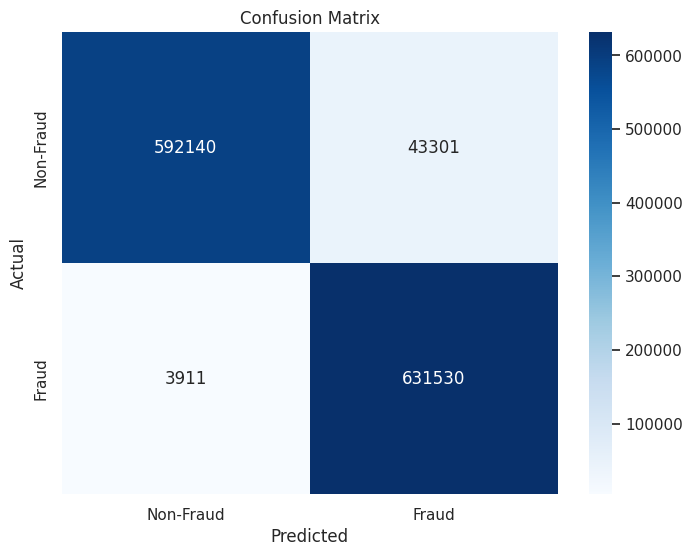

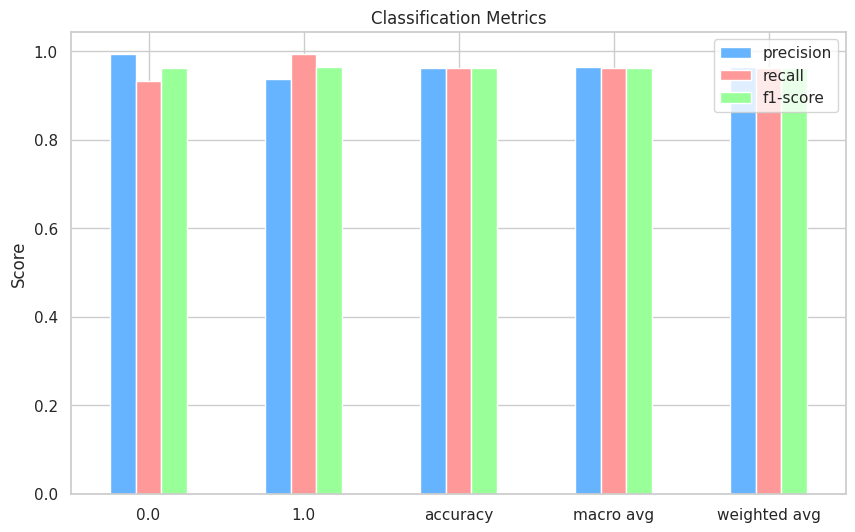

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract precision, recall, and F1 score from the report
metrics = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score for each class
metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()



  import seaborn as sns and import matplotlib.pyplot as plt: Imports the necessary libraries for plotting.
  from sklearn.metrics import confusion_matrix, classification_report: Imports the functions used to generate the evaluation metrics (although the metrics were calculated in the previous cell, these imports might be included for completeness).
  Plot Confusion Matrix:
        plt.figure(figsize=(8, 6)): Sets the size of the plot figure.
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud']): This generates a heatmap of the confusion matrix (cm).
            annot=True: Displays the count values on the heatmap cells.
            fmt='d': Formats the annotations as integers.
            cmap='Blues': Sets the color map to shades of blue.
            xticklabels, yticklabels: Sets the labels for the axes to clearly indicate "Non-Fraud" and "Fraud".
        plt.title(...), plt.xlabel(...), plt.ylabel(...): Adds a title and labels to the confusion matrix plot.
        plt.show(): Displays the confusion matrix heatmap.
  Extract and Plot Classification Metrics:
        metrics = pd.DataFrame(report).transpose(): This converts the report dictionary (from the classification report in the previous cell) into a pandas DataFrame and then transposes it. This makes it easier to plot the metrics for each class.
        metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999', '#99ff99']): This selects the 'precision', 'recall', and 'f1-score' columns from the metrics DataFrame and generates a grouped bar plot.
            kind='bar': Specifies a bar plot.
            figsize=(10, 6): Sets the figure size.
            color=[...]: Sets the colors for the bars representing each metric.
        plt.title(...), plt.ylabel(...), plt.xticks(rotation=0): Adds a title, y-axis label, and sets the x-axis label rotation to 0.
        plt.show(): Displays the classification metrics bar plot.

These visualizations provide a clear and easily understandable summary of the model's performance in terms of where it made correct and incorrect predictions (confusion matrix) and its effectiveness in terms of precision, recall, and F1-score for each class.

# **Conclusion:**
This project demonstrates the effective use of neural networks for detecting fraud in online financial transactions. Through extensive data preprocessing, class balancing with SMOTE, and model evaluation, the neural network achieved high performance in both identifying fraud and minimizing false positives. The analysis also highlighted the importance of focusing on specific transaction types (TRANSFER and CASH_OUT) where fraud is more likely.

Going forward, further improvements could include:

 Integrating real-time transaction monitoring.

 Deploying the model in production via an API.

Incorporating time-series analysis or user behavioral profiling.

The success of this project showcases how machine learning, especially deep learning, can play a vital role in financial cybersecurity.

